# Abalone Case Study
![Abalone](https://projectsbasedlearning.com/wp-content/uploads/2020/12/Predict-the-age-of-abalone-from-physical-measurements.png)

## What is Abalone?
### Abalone is a popular choice of seafood—a shellfish to be precise—that lives in cold coastal waters around the world. Biologically, abalone is a mollusk belonging to the Gastropoda class. In plain English, this means that abalone is technically a type of marine snail.

## Whats the need to study Abalone Case
### Abalone is a rich nutritious food resource in the many parts of the world. The economic value of abalone is positively correlated with its age. However, determining the age of abalone is a cumbersome as well as expensive process which increases the cost and limits its popularity

### About the data set
#### Data comes from an original (non-machine-learning) study : The Population Biology of Abalone (_Haliotis_ species) in Tasmania. From the original data examples with missing values were removed, and the ranges of the continuous values have been scaled by dividing with 200.
#### Variable discription
    `Sex`: M (male), F (female), I (infant)
    `Length`: longest shell measurement (in mm)
    `Diameter`: measurement perpendicular to legnth (in mm)
    `Height`: with meat in shell (in mm)
    `Whole weight`: the whole abalone (in grams)
    `Shucked weight`: weight of the meat (in grams)
    `Viscera weight`: gut weight after bleeding (in grams)
    `Shell weight`: after being dried (in grams)
    `Rings`: + 1.5 gives the age in years (the value to predict)

## In this case study, we will predict the rings of each abalone which will lead us to the age of that abalone. 

# Importing libraries

In [2]:
# import necessary Libraries
import pandas as pd
import numpy as np

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

#feature engineering
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

#ML models
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn import feature_selection as fs
from scipy import stats



# Data Collection and information

In [3]:
#read the data

abalone = pd.read_csv('abalone.csv')
abalone.sample(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3392,M,0.645,0.515,0.185,1.4605,0.5835,0.3155,0.4100,19
1705,M,0.640,0.525,0.185,1.7070,0.7630,0.4205,0.4435,11
3797,M,0.695,0.580,0.200,1.8995,0.6750,0.4780,0.5295,13
2563,I,0.440,0.355,0.120,0.4950,0.2310,0.1100,0.1250,7
1976,M,0.695,0.545,0.185,1.5715,0.6645,0.3835,0.4505,13


In [7]:
#Make a copy of original dataset and use the new dataset called "abl" for following steps.

abl = abalone.copy()

In [5]:
abl.describe(include = ['int64','float64'])

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


    - Though features are not normaly distributed, are close to normality
    - Each feature has difference scale range
    - None of the features have minimum = 0 except Height (requires re-check)

In [9]:
# check height ==0
(abl.Height ==0).sum()

2

In [11]:
abl[abl['Height']==0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


    -number of missing values is 2 and is in the infant sex. 
    -We will fill in the missing value with the average Height feature for the immature gender

In [12]:
mean = pd.pivot_table(abl,index=['Sex'],aggfunc={'Height':np.mean})
mean

,Height
Sex,
F,0.158011
I,0.107996
M,0.151381


    -So we will fill in the missing value with 0.107996

In [14]:
abl['Height'] = abl['Height'].replace(to_replace=0,value =0.107996 )

In [15]:
#It seems that no attributes contain NaN values, check it to make sure.

abl.isnull().sum(axis=0)


Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

        -  No missing values in the dataset
        -  All the features are numerical except "Sex" coloumn

# Exploratory Data Analysis

In [16]:
# Dimension of dataset

print(abl.shape)

print("No. of rows : ", abl.shape[0])
print("No. of columns : ", abl.shape[1])

(4177, 9)
No. of rows :  4177
No. of columns :  9


In [17]:
# unique values
abalone.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
dtype: int64

In [18]:
#check duplicate values
abl.duplicated().sum()

0

    -No Duplicate Values

# Skewness

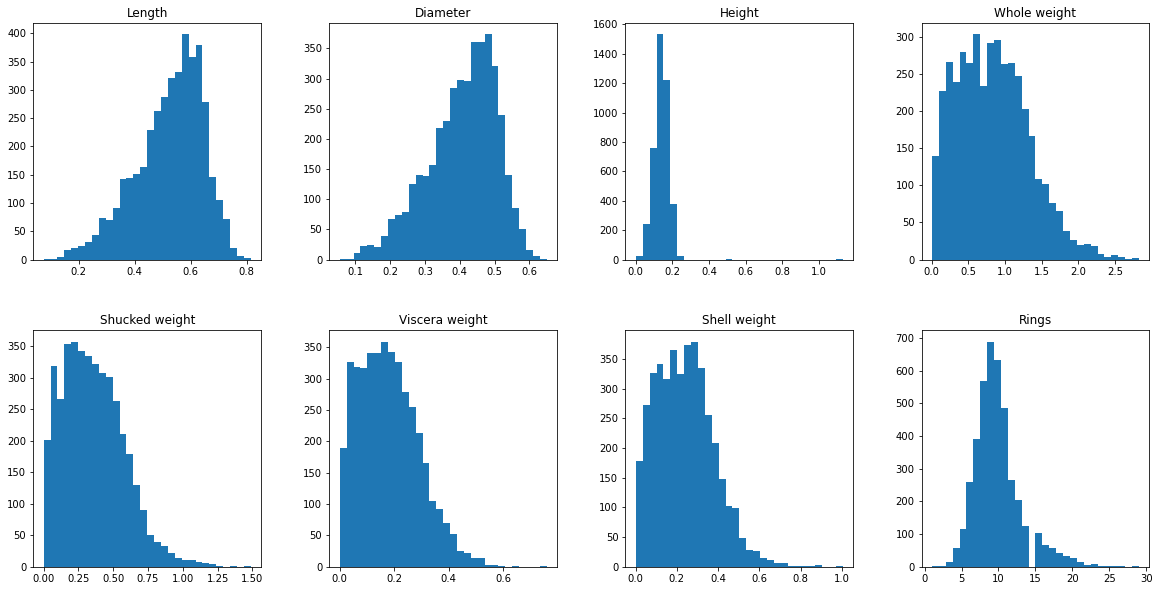

In [9]:
# Histogram
abalone.hist(figsize=(20,10), grid = False, layout=(2,4), bins = 30);

    -Histograms show that the data may be skewed, so it will be reasonable to measure it.

    -It also shows that there are possible outliers in Height and that there might be a strong relationship between the Diameter and Lenghth and between Shell weight, Shucked weight Viscera weight and Whole weight.

In [19]:
nf = abl.select_dtypes(include=[np.number]).columns
cf = abl.select_dtypes(include=[np.object]).columns


In [20]:
skew_list = stats.skew(abl[nf])
skew_list_df = pd.concat([pd.DataFrame(nf,columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis = 1)
skew_list_df.sort_values(by='Skewness', ascending = False)

,Features,Skewness
2,Height,3.165561
7,Rings,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


        -Skewness value points in which direction data is distorted in a statistical distribution, in Gaussian distribution the value for skewness is 0. In abalone data Height has highest skewness value followed by Rings.

    -High skewness in Height feature may be an outcome of outliers. I will investigate it further using scatter plots.

['M' 'F' 'I']


<AxesSubplot:xlabel='Sex', ylabel='count'>

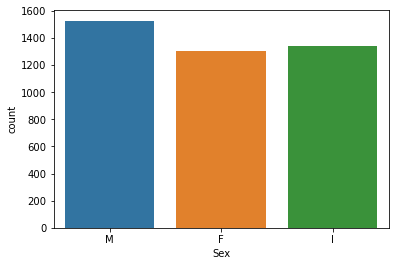

In [13]:
#distribution of categorical features
print(abalone['Sex'].unique())

sns.countplot(x = 'Sex', data = abalone)

    - We will convert Sex to numerical.
    - Immature may have lower rings

In [21]:
#confirm our observations and our assumptions

abl[['Sex', 'Rings']].groupby('Sex', as_index=False).mean().sort_values(by='Rings', ascending=False)

,Sex,Rings
0,F,11.129304
2,M,10.705497
1,I,7.890462


     -Immature have lower rings and Female have maximum rings

# Data Visualization

<AxesSubplot:>

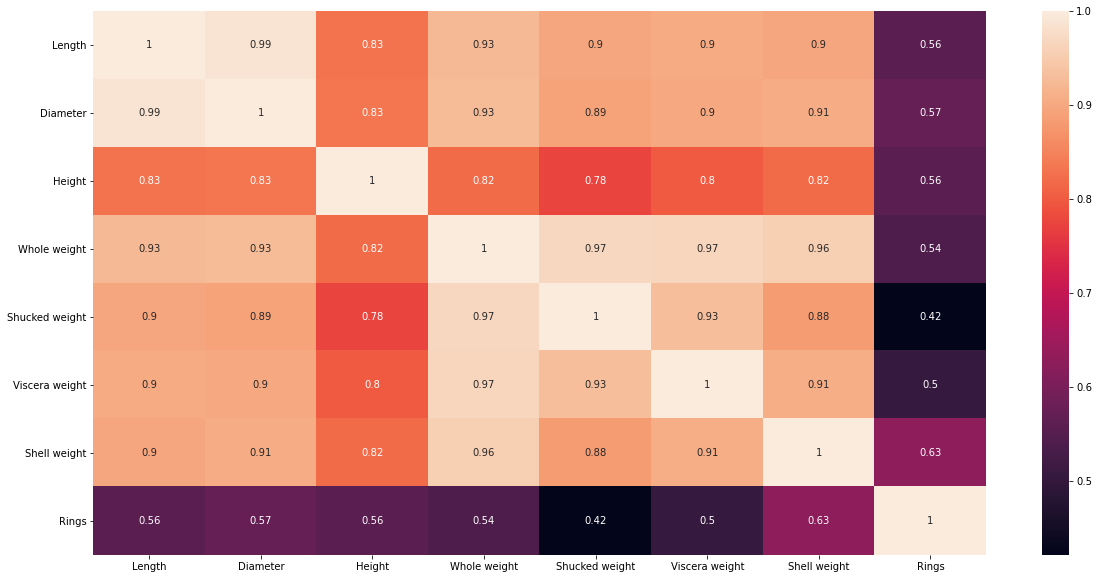

In [22]:
# corerelation between data using heatmap

plt.figure(figsize = (20,10))
sns.heatmap(abl.corr(),annot = True)

#### The heat map shows that features are highly correlated and multicollinearity is possible.

    -Whole weight is almost linearly correlated with all the features except Rings
    -Length is linearly correlated with Diameter
    -From all the features excluding Rings, Height is least correlated with other features
    -Rings feature has the highest correlation with Shell Weight followed by Height, Length and Diameter

#### Possible solutions for a high level of collinearity in data:

    - Use principal component analysis(PCA) to generate new features
    - Select partial features for modelling

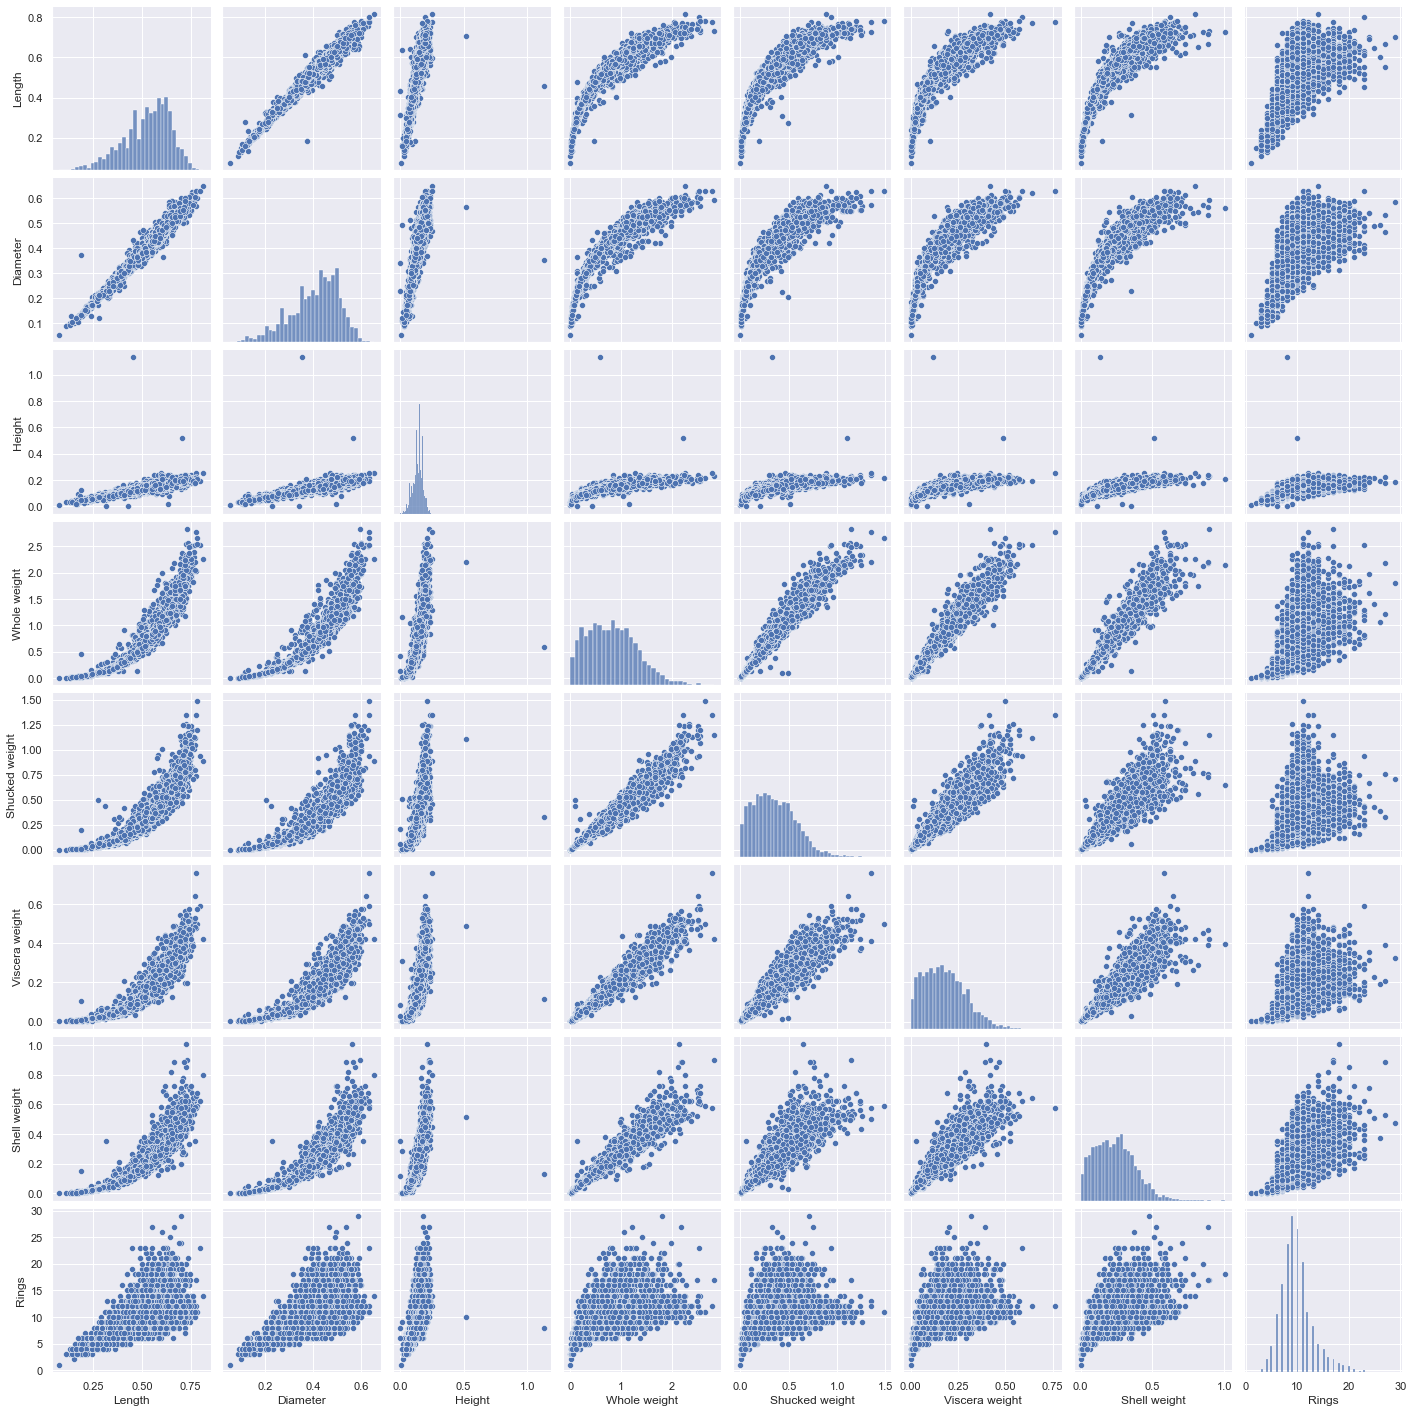

In [17]:
sns.set()
cols = ['Length','Diameter','Height','Whole weight', 'Shucked weight','Viscera weight', 'Shell weight','Rings']
sns.pairplot(abalone[cols], height = 2.5)
plt.show();

Observations:

    - Many features are highly correlated
    - length and diameter show linear correlation
    - the length and weight features are quadratic correlated
    - whole weight is linearly correlated with other weight features
    - Number of Rings is positively corelated with almost all quadratic features
    - Possible outliers in Height features

 #### Scatter plot analysis also shows that data mostly cover the values for Rings from 3 to little over 20, selecting only this data in the model may be taken under consideration to increase the accuracy.



# Categorical Feature
#### Finally, I will analyse the relation of Rings with the Sex feature

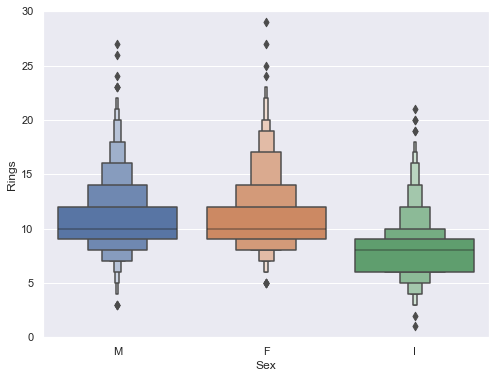

In [18]:
data = pd.concat([abalone['Rings'], abalone['Sex']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxenplot(x='Sex', y="Rings", data=abalone)
fig.axis(ymin=0, ymax=30);

## One-hot-encoding

In [23]:
#spliting data into target and features

abl_all = abl.drop(columns="Rings")
target = abl['Rings']

# one hot encoding
abl_all = pd.get_dummies(abl_all)
abl_all.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [24]:
abl_all.shape

(4177, 10)

In [25]:
target.value_counts()


9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

#### As we can see the classes of target are not balanced.

## Scaling

In [72]:
abl_unscaled=abl_all.values
abl_minmax = preprocessing.MinMaxScaler().fit_transform(abl_unscaled)

## Feature selection

In [73]:
clf = KNeighborsClassifier(n_neighbors=1)


scoring_metric = 'accuracy'

cv_results_full = cross_val_score(estimator=clf,X=abl_minmax,y=target,scoring=scoring_metric)

cv_results_full


array([0.15789474, 0.21650718, 0.19161677, 0.2251497 , 0.22275449])

In [74]:
cv_results_full.mean().round(4)

0.2028

## Feature Selection Using F-Score

In [75]:
num_features = 10

fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=num_features)
fs_fit_fscore.fit_transform(abl_minmax, target)
fs_indices_fscore = np.argsort(fs_fit_fscore.scores_)[::-1][0:num_features]
fs_indices_fscore


array([1, 0, 6, 2, 3, 5, 4, 8, 7, 9], dtype=int64)

In [76]:
abl_all.dtypes

Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Sex_F               uint8
Sex_I               uint8
Sex_M               uint8
dtype: object

In [77]:
best_features_fscore = abl_all.columns[fs_indices_fscore].values
best_features_fscore

array(['Diameter', 'Length', 'Shell weight', 'Height', 'Whole weight',
       'Viscera weight', 'Shucked weight', 'Sex_I', 'Sex_F', 'Sex_M'],
      dtype=object)

In [78]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([196.43610528, 188.50942458, 147.23694566, 124.69867624,
       113.71233973, 103.72143783,  80.79767682,  68.87047717,
        15.78351983,  10.62934022])

In [79]:
cv_results_fscore = cross_val_score(estimator=clf,
 X=abl_minmax[:, fs_indices_fscore[:8]],
 y=target,
 cv=5,
 scoring=scoring_metric)
cv_results_fscore.mean().round(4)


0.2042

## Feature Selection Using Random Forest


In [80]:
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(abl_minmax, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

In [81]:
best_features_rfi = abl_all.columns[fs_indices_rfi].values
best_features_rfi


array(['Shell weight', 'Shucked weight', 'Viscera weight', 'Whole weight',
       'Length', 'Diameter', 'Height', 'Sex_M', 'Sex_F', 'Sex_I'],
      dtype=object)

In [82]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi


array([0.16196132, 0.15373764, 0.15051392, 0.14836104, 0.11678331,
       0.11165466, 0.10607099, 0.01812201, 0.01737542, 0.01541969])

### we can see, at a 90% significance level, feature selection by RFI is also better than result of full set.Based on all above, we will choose top 5 feature in RFI feature selection.

In [83]:
abl_all.columns[fs_indices_rfi[:5]]

Index(['Shell weight', 'Shucked weight', 'Viscera weight', 'Whole weight',
       'Length'],
      dtype='object')

In [84]:
abl_minmax_df = pd.DataFrame(data = abl_minmax,columns = abl_all.columns)

In [85]:
abl_rfi = abl_minmax_df[abl_all.columns[fs_indices_rfi[:5]].values]
abl_rfi = abl_rfi.values


## Hyperparameter tuning
### K-NN


In [86]:
cv_method = StratifiedKFold(n_splits=10)
params_KNN = {'n_neighbors': [2, 4, 8, 16, 32, 64], # largest k should be less than sqrt(n) = sqrt(4177) which is 64
             'p': [1, 2]}
gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(),
         param_grid=params_KNN,
         cv=cv_method,
         verbose=1, # verbose: the higher, the more messages
         scoring='accuracy',
         return_train_score=True)

In [87]:
gs_KNN.fit(abl_rfi, target);

Fitting 10 folds for each of 12 candidates, totalling 120 fits


In [88]:
gs_KNN.best_params_

{'n_neighbors': 64, 'p': 1}

In [89]:
gs_KNN.best_score_

0.2664721811067892

In [90]:
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])

In [91]:
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']


In [92]:
results_KNN['metric'] = results_KNN['p'].replace([1,2,3], ["Manhattan", "Euclidean", "Minkowski"
])
results_KNN

,n_neighbors,p,test_score,metric
0,2,1,0.219788,Manhattan
1,2,2,0.218351,Euclidean
2,4,1,0.214268,Manhattan
3,4,2,0.217632,Euclidean
4,8,1,0.237738,Manhattan
5,8,2,0.240612,Euclidean
6,16,1,0.254981,Manhattan
7,16,2,0.253546,Euclidean
8,32,1,0.253780,Manhattan
9,32,2,0.261199,Euclidean


## Decision tree

In [96]:
df_classifier = DecisionTreeClassifier(random_state=4)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3]}
cv_method = StratifiedKFold(n_splits=5)
gs_DT = GridSearchCV(estimator=df_classifier,
 param_grid=params_DT,
 cv=cv_method,
 verbose=1,
 scoring='accuracy')
gs_DT.fit(abl_rfi, target);

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [97]:
gs_DT.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2}

In [98]:
gs_DT.best_score_


0.27076698278084976

In [99]:
results_DT = pd.DataFrame(gs_DT.cv_results_['params'])
results_DT['test_score'] = gs_DT.cv_results_['mean_test_score']
results_DT.columns


Index(['criterion', 'max_depth', 'min_samples_split', 'test_score'], dtype='object')

#### we can see, the parameters of best model in DT algorithm is max_depth = 4, min_samples_split = 2 using gini criterion. The best accuracy are 0.2627.


## Random forest

In [100]:
df_classifier = RandomForestClassifier(random_state=4)

params_RF = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3]}
cv_method = StratifiedKFold(n_splits=5)
gs_RF = GridSearchCV(estimator=df_classifier,
 param_grid=params_RF,
 cv=cv_method,
 verbose=1,
 scoring='accuracy')
gs_RF.fit(abl_rfi, target);

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [101]:
gs_RF.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 2}

In [102]:
gs_RF.best_score_

0.2777156691401885

In [103]:
gs_RF.cv_results_['mean_test_score']

array([0.20780506, 0.20780506, 0.25784517, 0.25784517, 0.27245022,
       0.27245022, 0.27149357, 0.27197261, 0.27197261, 0.27436639,
       0.2731662 , 0.27532189, 0.27699968, 0.2726906 , 0.26526832,
       0.27268945, 0.20732774, 0.20732774, 0.25257972, 0.25257972,
       0.27149242, 0.27149242, 0.274844  , 0.274844  , 0.27029654,
       0.26981864, 0.2741283 , 0.27604475, 0.27771567, 0.27364754,
       0.27125433, 0.27221471])

In [104]:
results_RF = pd.DataFrame(gs_RF.cv_results_['params'])
results_RF['test_score'] = gs_RF.cv_results_['mean_test_score']
results_RF.columns


Index(['criterion', 'max_depth', 'min_samples_split', 'test_score'], dtype='object')

## Linear regression

In [105]:
kf = KFold(n_splits=5)

test = []
prediction = []
model = LinearRegression()
for train_index,test_index in kf.split(abl_rfi):
    X_train,X_test = abl_rfi[train_index],abl_rfi[test_index]
    y_train, y_test = target.values[train_index], target.values[test_index]
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    prediction += [pred[x] for x in range(len(pred))]
    test += [y_test[x] for x in range(len(y_test))]

error = mean_squared_error(test,prediction)

print(error) # mean squared error
print(error**0.5) # root mean square

5.495495726045761
2.3442473687829453


#### The RMSE of linear regression is 2.34. However, since our target 'Rings' should be integers, linear models may not be able to simulate raw data very well. Then we use logistic regression

In [106]:
test = []
prediction = []
model = LogisticRegression()
for train_index,test_index in kf.split(abl_rfi):
    X_train,X_test = abl_rfi[train_index],abl_rfi[test_index]
    y_train, y_test = target.values[train_index], target.values[test_index]
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    prediction += [pred[x] for x in range(len(pred))]
    test += [y_test[x] for x in range(len(y_test))]
    
error = mean_squared_error(test,prediction)
print(error) # mean squared error
print(error**0.5) # root mean square


8.449844385922912
2.9068616041915227


#### Although the RMSE of logistic are higher than linear, this is because the integer data. For logistic regression, in order to compare with other filters, we can also get the accuracy using LogisticRegressionCV().


In [107]:
# LogisticRegression cross validation
model = LogisticRegressionCV()
cv_results_logic = cross_val_score(model,abl_rfi,target.values,cv = 5)

cv_results_logic.mean().round(4)


nan

## Model comparison

In [108]:
cv_method_ttest = StratifiedKFold(n_splits=10)
cv_results_KNN = cross_val_score(estimator=gs_KNN.best_estimator_,
                                 X=abl_rfi,
                                 y=target,
                                 cv=cv_method_ttest,
                                 n_jobs=-2,
                                 scoring='accuracy')

cv_results_KNN.mean()


0.2664721811067892

In [109]:
cv_results_RF = cross_val_score(estimator=gs_RF.best_estimator_,
                                 X=abl_rfi,
                                 y=target,
                                 cv=cv_method_ttest,
                                 n_jobs=-2,
                                 scoring='accuracy')

cv_results_RF.mean()


0.2710233726894083

In [110]:
cv_results_DT = cross_val_score(estimator=gs_DT.best_estimator_,
                                 X=abl_rfi,
                                 y=target,
                                 cv=cv_method_ttest,
                                 n_jobs=-2,
                                 scoring='accuracy')
cv_results_DT.mean()

0.26335180659300306

In [111]:
print(stats.ttest_rel(cv_results_RF, cv_results_KNN))
print(stats.ttest_rel(cv_results_RF, cv_results_DT))

Ttest_relResult(statistic=0.5845855851201651, pvalue=0.5731868584825386)
Ttest_relResult(statistic=1.3155881897400457, pvalue=0.2208376391677663)


#### A p-value larger than 0.05 indicates there is no statistically significant difference. Looking at these results, we conclude that at a 95% significance level, although RF have higher score, we can't say that RF is statistically better than other models in this competition (in terms of accuracy)

#### To find best model, we shall consider the following metrics to evaluate models based on the test set:
        -Precision
        -Recall
        -F1 Score (the harmonic average of precision and recall)
        -Confusion Matrix


In [112]:
pred_KNN = gs_KNN.predict(abl_rfi)
pred_DT = gs_DT.predict(abl_rfi)
pred_RF = gs_RF.predict(abl_rfi)

In [113]:
print("\nClassification report for K-Nearest Neighbor")
print(metrics.classification_report(target, pred_KNN))
print("\nClassification report for Decision Tree")
print(metrics.classification_report(target, pred_DT))
print("\nClassification report for Random Forest")
print(metrics.classification_report(target, pred_RF))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        15
           4       0.46      0.56      0.50        57
           5       0.40      0.47      0.43       115
           6       0.36      0.35      0.35       259
           7       0.32      0.43      0.37       391
           8       0.33      0.39      0.35       568
           9       0.30      0.41      0.34       689
          10       0.24      0.34      0.28       634
          11       0.28      0.28      0.28       487
          12       0.24      0.05      0.08       267
          13       0.25      0.10      0.14       203
          14       0.31      0.03      0.06       126
          15       0.14      0.01      0.02       103
          16       0.20      0.03      0.05        67
          17       1.00      0.02  

In [115]:
print("\nConfusion matrix for K-Nearest Neighbor")
print(metrics.confusion_matrix(target, pred_KNN)) 
print("\nConfusion matrix for Random Forest")
print(metrics.confusion_matrix(target, pred_RF)) 
print("\nConfusion matrix for Decision Tree")
print(metrics.confusion_matrix(target, pred_DT)) 


Confusion matrix for K-Nearest Neighbor
[[  0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  14   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  32  21   4   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  17  54  32  12   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   4  36  91  97  26   3   1   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1  16  70 167 101  31   2   3   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   7  22 105 220 159  46   7   0   2   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1  

#### Based on the classification report and confusion matrix, Random Forest have best overall performance.


## Save the model

In [ ]:
import pickle

filename = 'abalone.pkl'
pickle.dump(cv_results_RF, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(target)